# Final Project Notebook

Use the follow cells prompts to complete the final project for the course. Everything you need should be present in this notebook or previous notebooks we've used in class. You can work together as needed. 

 - You will need to name your own dataset and use that name throughout
 - There are sections where you need to make changes the code and insert new code this will be noted in the code provided
 - You may get frustrated along the way, this is totally normal, just remember even small changes to the code make a huge difference. 

## Question Fork the Repository
i. Include a screenshot of the forked repo in your GitHub account

To fork the repository:
1. Go to https://github.com/NovaVolunteer/ds1001_final
2. Click the "Fork" button in the top right corner
3. The repo will be forked to your GitHub account
4. Take a screenshot of your forked repository

### You should now be able to open your cloned repo in google collab, use the code below. 

### It's very helpful to have the variable inspector open while you go through this process. To do so go to tools>command palette>show variable inspector

### It's also helpful to open up the folder tree on the left menu bar. Just click on the folder icon and then the ds1001_final folder. The data is located in the data folder in the processed sub-folder. 

In [1]:
!git clone "https://github.com/ciarafitz54/ds1001_final.git"
# This script clones a GitHub repository using Git command line tool. 
# Insert the path to your desired repository in place of the URL.

fatal: destination path 'ds1001_final' already exists and is not an empty directory.


## Systems

In [2]:
# Activate the finalproj environment
!source ds1001_final/ds1001_final/finalproj/bin/activate

In [3]:
### You can use this command to list all the packages in your environment
!pip list

Package                 Version
----------------------- -----------
asttokens               3.0.1
attrs                   25.4.0
Automat                 25.4.16
certifi                 2025.11.12
cffi                    2.0.0
charset-normalizer      3.4.4
comm                    0.2.3
constantly              23.10.4
contourpy               1.3.3
cryptography            46.0.3
cssselect               1.3.0
cycler                  0.12.1
debugpy                 1.8.17
decorator               5.2.1
defusedxml              0.7.1
executing               2.2.1
fairlearn               0.13.0
filelock                3.20.0
fonttools               4.61.0
greenlet                3.2.4
happybase               1.3.0
hyperlink               21.0.0
idna                    3.11
importlib_resources     6.5.2
Incremental             24.11.0
ipykernel               7.1.0
ipython                 9.7.0
ipython_pygments_lexers 1.1.1
itemadapter             0.12.2
itemloaders             1.3.2
jedi         

In [4]:
!pip install "XX"

#You'll likely need to install the fairlearn packages, if not already installed.
#Are there additional packages to install? (Cross check with the list above to 
# ensure all packages are installed)

### Check !pip list again to confirm installations

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import fairlearn.metrics
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import count, true_positive_rate, false_positive_rate, selection_rate, demographic_parity_ratio


## Design: Data prep and exploration 

In [6]:
bank = pd.read_csv('/workspaces/ds1001_final/ds1001_final/data/processed/bank_final.csv') # the data is the data folder, 
#you'll need to use the correct path to the dataset. 

# How many rows are in the dataframe? How many columns?
print(f"Shape: {bank.shape}")
print(f"Rows: {bank.shape[0]}")
print(f"Columns: {bank.shape[1]}")

# How many numeric columns?
numeric_columns = bank.select_dtypes(include=['number']).columns
print(f"Numeric columns count: {len(numeric_columns)}")
print(f"Numeric columns: {list(numeric_columns)}")

Shape: (43628, 13)
Rows: 43628
Columns: 13
Numeric columns count: 5
Numeric columns: ['age', 'balance', 'duration', 'contactndays', 'signed up']


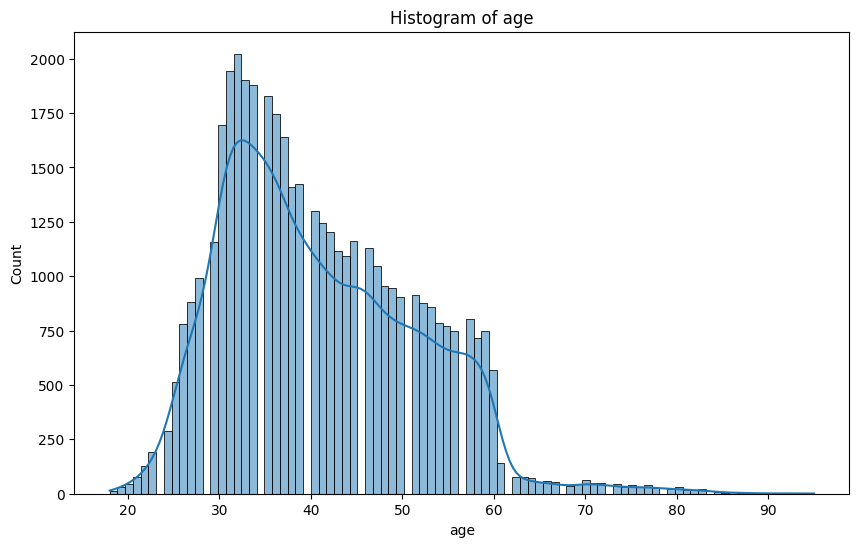

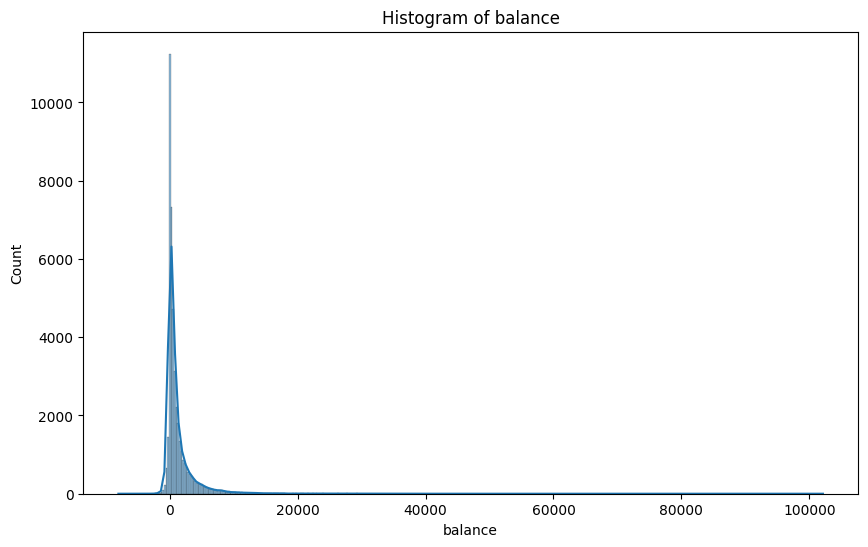

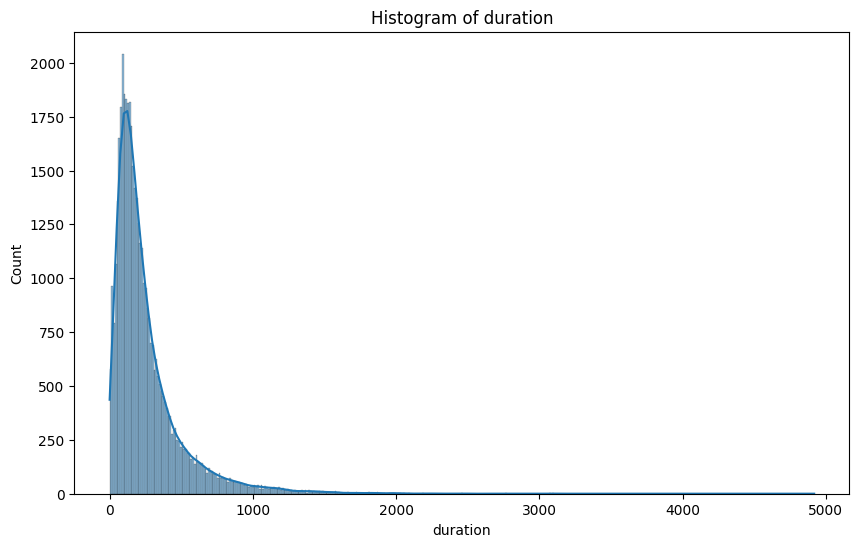

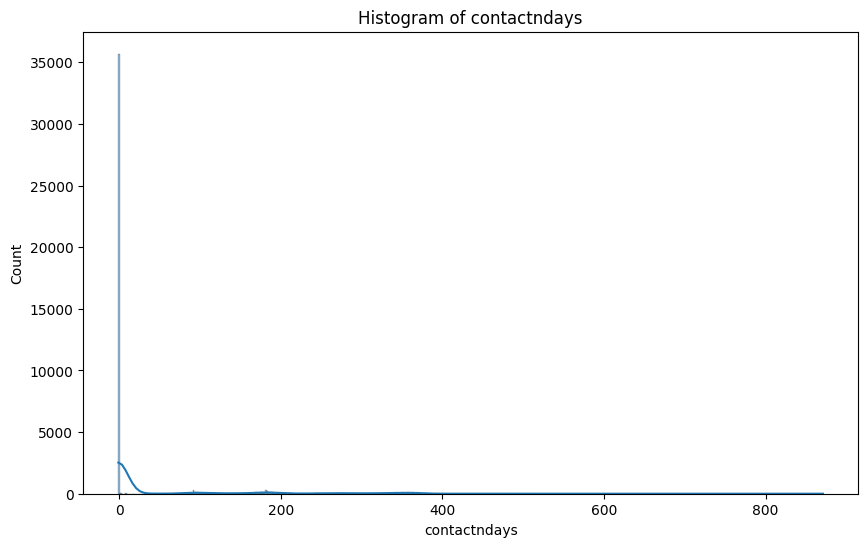

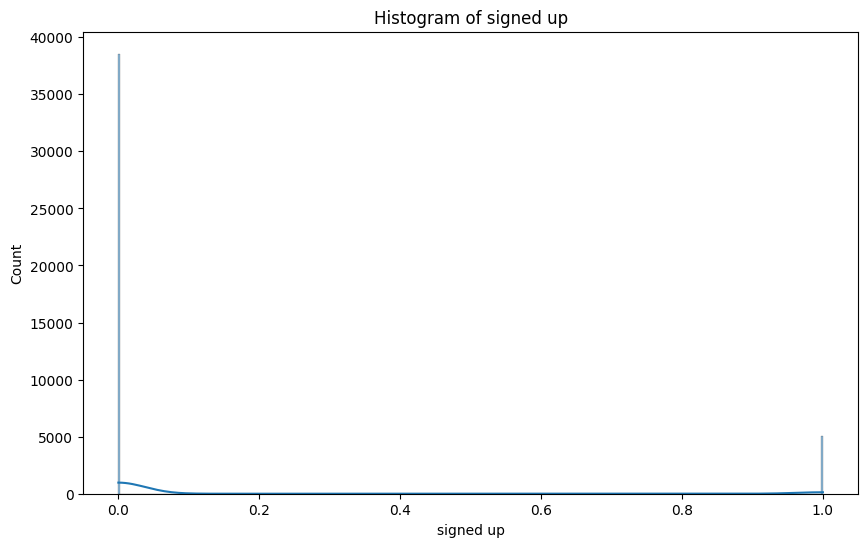

In [7]:
# Explore the variables a bit more, create histograms for the numerics values and bar charts for the categorical.
# Histograms for numeric variables
numeric_columns = bank.select_dtypes(include=['number']).columns
for col in numeric_columns: 
    plt.figure(figsize=(10, 6))
    sns.histplot(bank[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

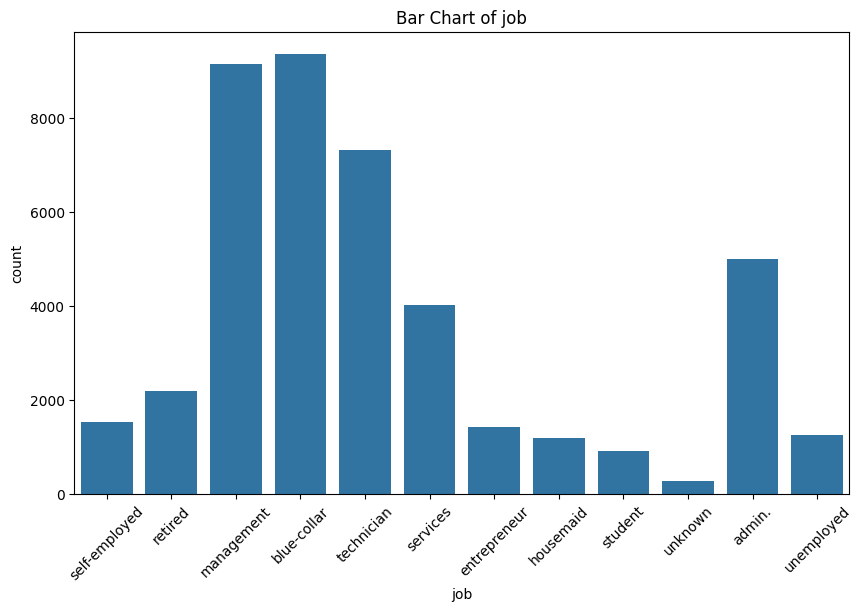

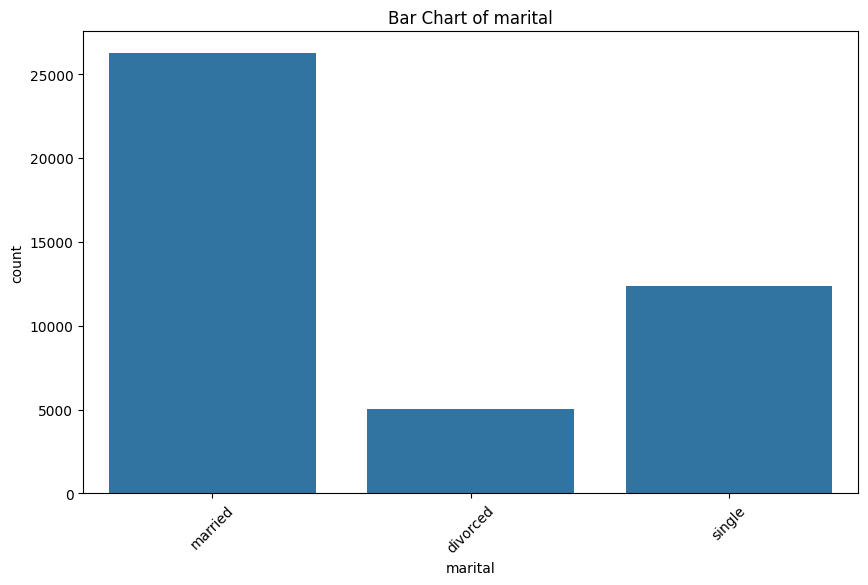

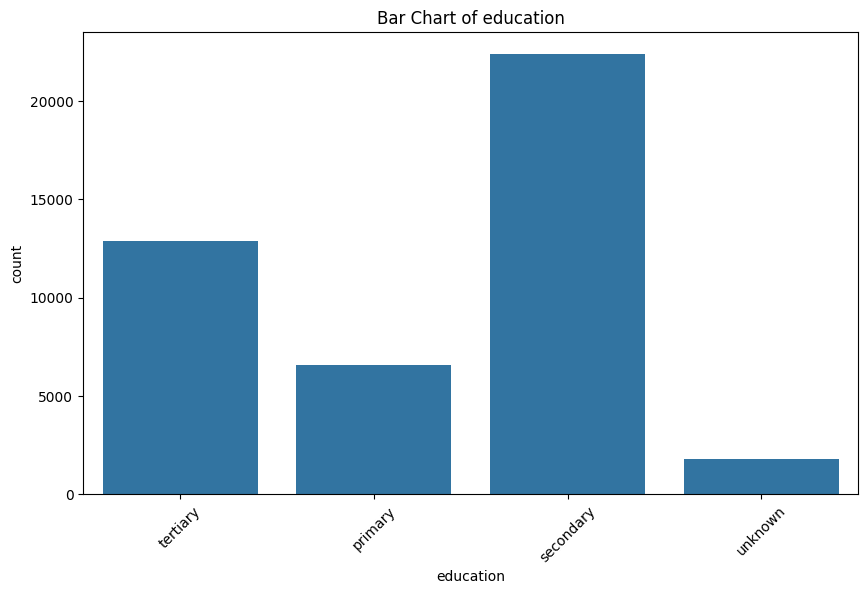

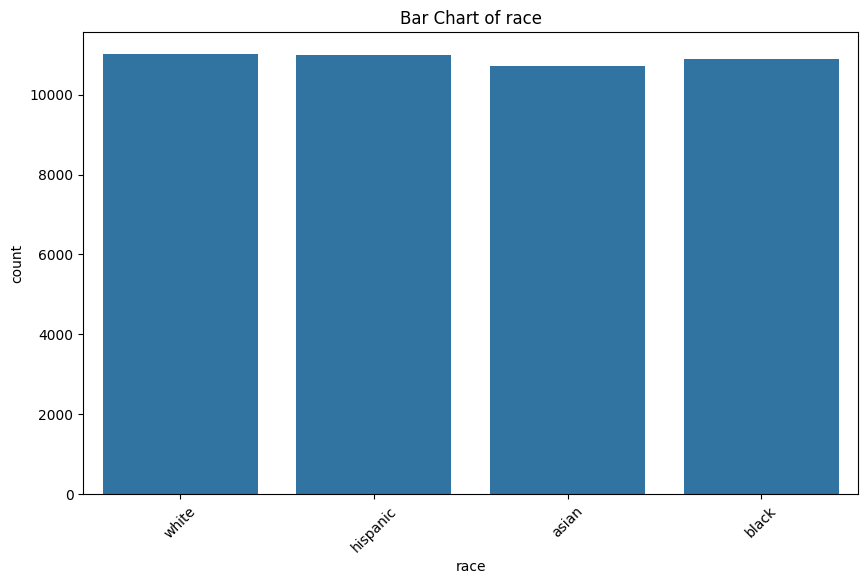

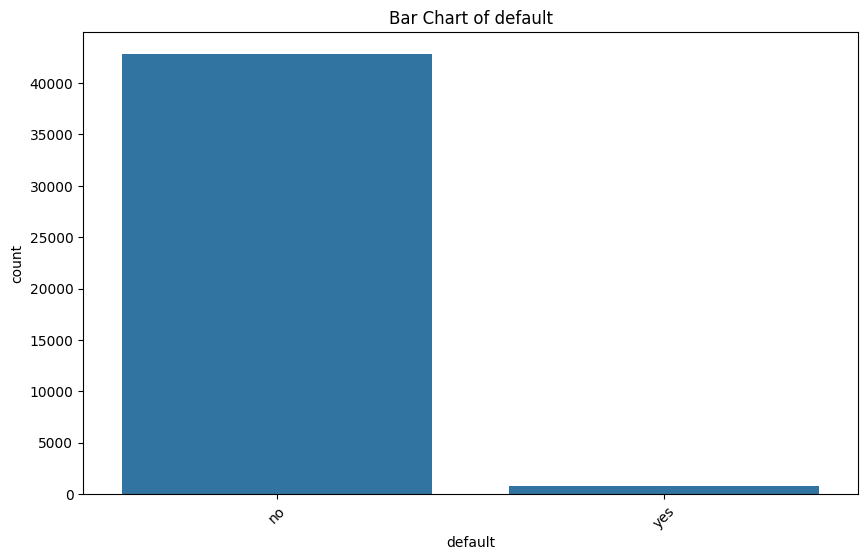

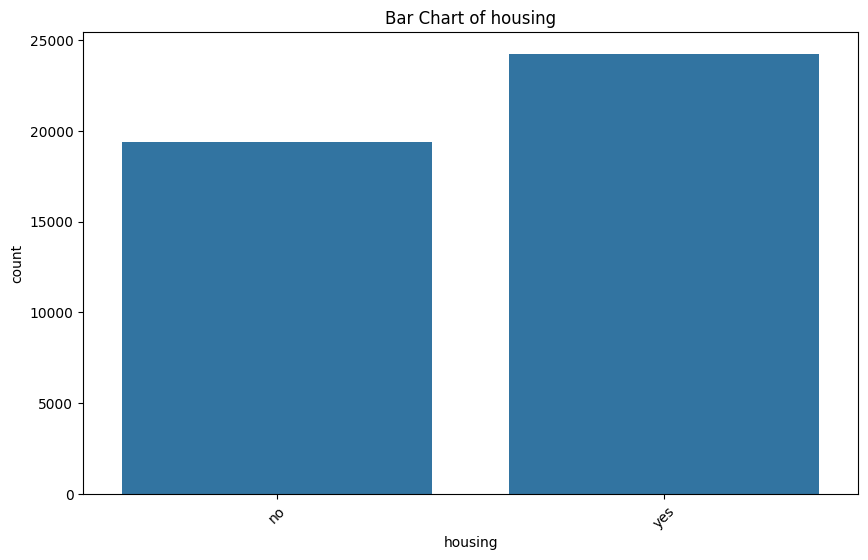

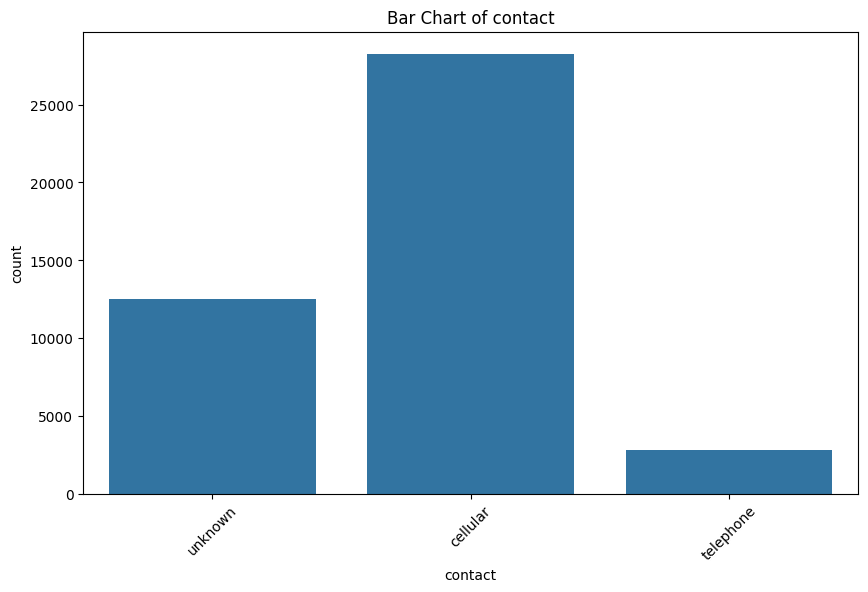

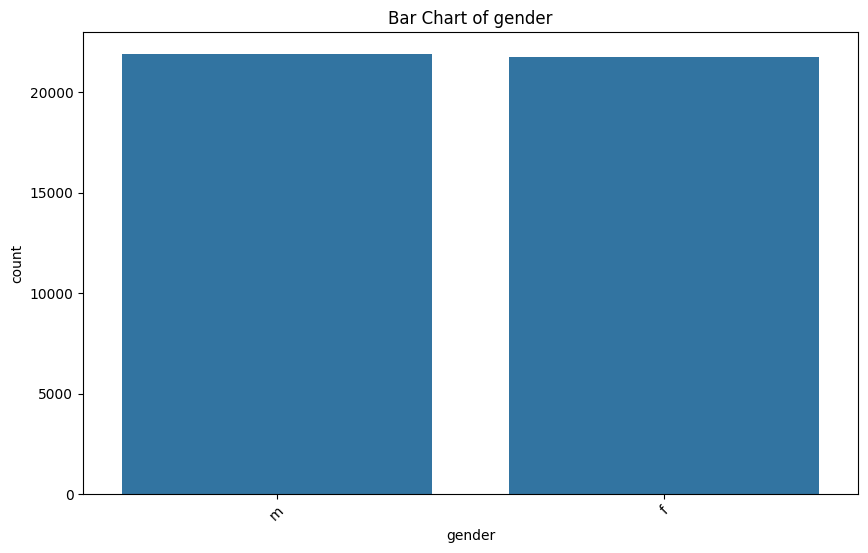

In [8]:
# Bar charts for categorical variables
categorical_columns = bank.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=bank[col])
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
# How many numeric columns are in the data set?
num_numeric_columns = bank.select_dtypes(include=['number']).shape[1]
print(f"Numeric columns: {num_numeric_columns}")
print(f"Current dataset shape: {bank.shape}")
print(f"Columns added: {bank.shape[1] - 13} (original had 13)")
print(f"All columns: {list(bank.columns)}")

Numeric columns: 5
Current dataset shape: (43628, 13)
Columns added: 0 (original had 13)
All columns: ['age', 'job', 'marital', 'education', 'race', 'default', 'balance', 'housing', 'contact', 'duration', 'contactndays', 'signed up', 'gender']


In [10]:
# Normalization
scaler = MinMaxScaler()
bank[bank.select_dtypes(include=['number']).columns] = scaler.fit_transform(bank.select_dtypes(include=['number']))

In [11]:
# Likely need to convert categorical columns to category dtype
for col in bank.select_dtypes(include=['object']).columns:
    bank[col] = bank[col].astype('category')   

In [12]:
# Creating dummy variables, make sure the variables that need to be converted to dummies are categorical, not numeric.
# This might require you to convert some columns to categorical first using astype('category')
bank = pd.get_dummies(bank, drop_first=True)

In [13]:
# Display missing data using the isnull function, is there any missing data?
missing_data = bank.isnull().sum()
print("Missing data per column:")
print(missing_data)
print(f"\nTotal missing values: {missing_data.sum()}")
if missing_data.sum() == 0:
    print("✓ No missing data found!")
else:
    print(f"⚠ Found {missing_data.sum()} missing values")

Missing data per column:
age                    0
balance                0
duration               0
contactndays           0
signed up              0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
race_black             0
race_hispanic          0
race_white             0
default_yes            0
housing_yes            0
contact_telephone      0
contact_unknown        0
gender_m               0
dtype: int64

Total missing values: 0
✓ No missing data found!


In [14]:
# remove missing values if needed
bank = bank.dropna()

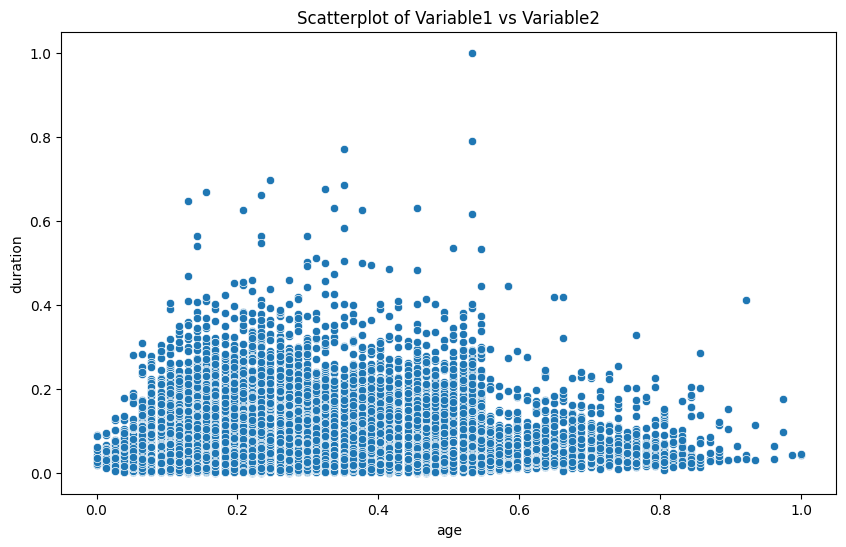

In [15]:
# Scatterplot between two continuous variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', data=bank)  # Replace 'Variable1' and 'Variable2' with your column names
plt.title('Scatterplot of Variable1 vs Variable2')
plt.savefig('scatterplot.png')  # Save the scatterplot image
plt.show()

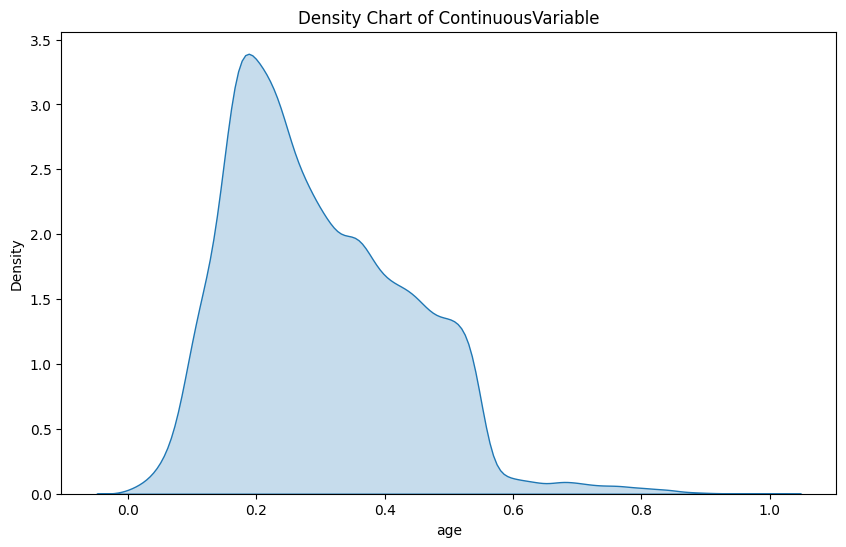

In [16]:
# Density chart of a continuous variable
plt.figure(figsize=(10, 6))
sns.kdeplot(bank['age'], fill=True)  # Replace 'ContinuousVariable' with your column name
plt.title('Density Chart of ContinuousVariable')
plt.show()

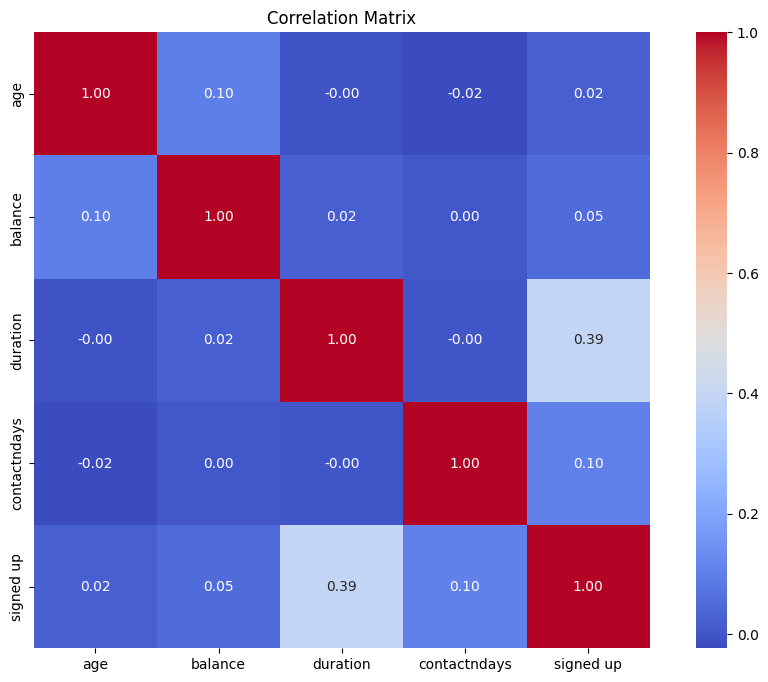

In [17]:
#Correlation matrix, make sure to only include numeric variables
num_values = bank.select_dtypes(include=['number'])
correlation_matrix = num_values.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Analytics: Build a model and Tune it for best Best Performance

In [18]:
# What is the 'target' of a model and what is the prevalence of the target in your dataset? Remember prevalence 
# is the proportion of records that take on the value of interest for the target variable, usually the positive class.
target_prevalence = bank['signed up'].sum()  # Replace 'signed up' with your target column name
print(f'Target Prevalence: {target_prevalence}')

Target Prevalence: 5074.0


In [19]:
# Divide the dataset into features and target
target = bank['signed up']  # Replace 'TargetVariable' with your actual target column name and "xx" with your dataframe name
features = bank.drop(columns=['signed up']) # Drop the target column from features


In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [21]:
# Include your table for the 10 values of k you tried and the corresponding accuracies.

accuracy_results = {}

# Replace x with your desired range values, explain what is happening in this loop
for k in range(1, 11):  
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_test, y_test)
    accuracy_results[k] = accuracy

In [22]:
# Create a table of k values and accuracies
results_df = pd.DataFrame(list(accuracy_results.items()), columns=['k', 'Accuracy'])
print("KNN Hyperparameter Tuning Results:")
print(results_df.to_string(index=False))
print(f"\nBest k value: {max(accuracy_results, key=accuracy_results.get)} with accuracy: {max(accuracy_results.values()):.4f}")

KNN Hyperparameter Tuning Results:
 k  Accuracy
 1  0.858927
 2  0.884369
 3  0.876690
 4  0.880931
 5  0.879555
 6  0.882650
 7  0.880243
 8  0.882191
 9  0.882764
10  0.883108

Best k value: 2 with accuracy: 0.8844


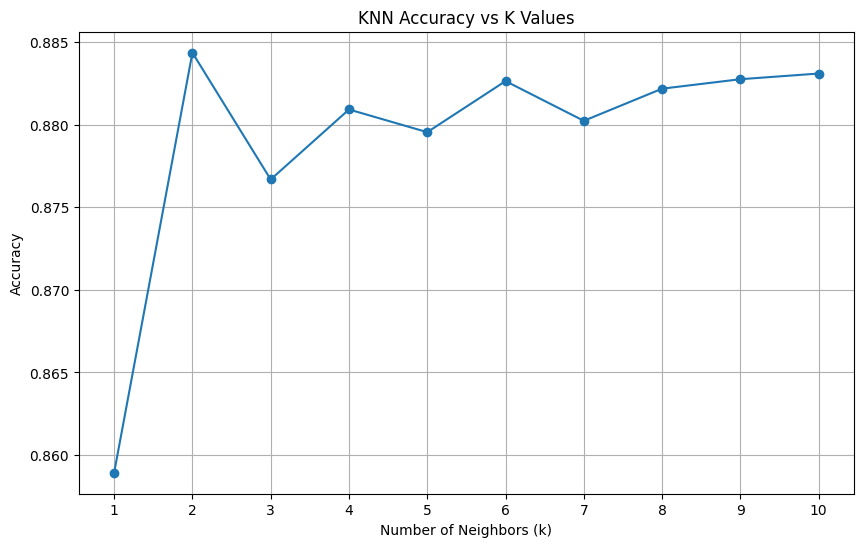

In [23]:
#graph of accuracy vs k values
plt.figure(figsize=(10, 6))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
plt.title('KNN Accuracy vs K Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(list(accuracy_results.keys()))
plt.grid()
plt.show()

In [24]:
# using the hyperparameter k that gave the best accuracy, rerun the model and generate 
# predictions on the test set. Explain why you choose this k value.
best_k = 2  # Replace 'xx' with the best k value found
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)  

## Value: Evaluation and Protected Classes

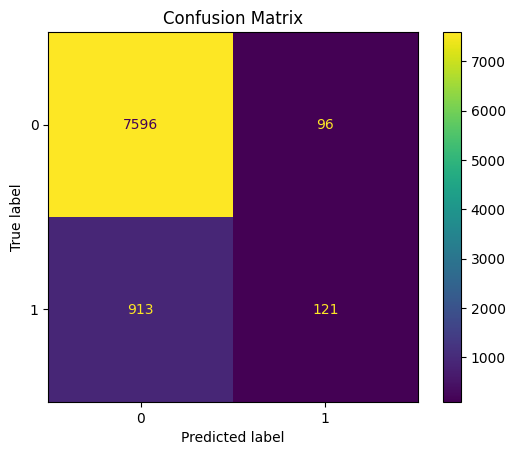

In [25]:
# create a confusion matrix for your model's predictions. 
# What does the confusion matrix tell you about your model's performance?
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [29]:
#We already have a model above using KNN so we can use the results to compute fairness metrics

# Compute fairness metrics using Fairlearn

my_metrics = {
    'true positive rate' : true_positive_rate,
    'false positive rate' : false_positive_rate,
    'selection rate' : selection_rate,
    'count' : count
}
# Construct a MetricFrame for race - use all race columns
mf_race = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test.filter(regex="^race_")  # Select all race columns
)

# Construct a MetricFrame for gender
mf_gender = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test["gender_m"]  # Use the gender_m column
)

In [30]:
mf_race.by_group #What do the results show? Change the mf_race with each subgroup and report the findings. This means
# you should run this cell multiple times, once for each of the levels in the race variable.

true positive rate  false positive rate  \
race_black race_hispanic race_white                                            
False      False         False                 0.088462             0.012712   
                         True                  0.120567             0.014440   
           True          False                 0.111538             0.011665   
                         True                       NaN                  NaN   
True       False         False                 0.150862             0.011117   
                         True                       NaN                  NaN   
           True          False                      NaN                  NaN   
                         True                       NaN                  NaN   

                                     selection rate   count  
race_black race_hispanic race_white                          
False      False         False             0.021881  2148.0  
                         True              0.027915  2221.0  
           True          False             0.023765  2146.0  
                         True                   NaN     NaN  
True       False         False             0.025780  2211.0  
                         True                   NaN     NaN  
           True          False                  NaN     NaN  
                         True                   NaN     NaN

In [31]:
mf_gender.by_group #What do the results show? There's only two groups here so we don't need to change anything. 
# in the metric frame.

,true positive rate,false positive rate,selection rate,count
gender_m,,,,
False,0.117117,0.012645,0.025971,4351.0
True,0.116910,0.012320,0.023771,4375.0


In [32]:
# Derived fairness metrics. Be sure you understand the scale and meaning of these. Here we are calculating the 
# two fairness ratios using the gender_m feature, which is bi-variate. What do the results show, is the model more or 
# less fair with this grouping?

dpr_gender = fairlearn.metrics.demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test['gender_m'])
print("Demographic Parity ratio:\t", dpr_gender)

eodds_gender = fairlearn.metrics.equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test['gender_m'])
print("Equalized Odds ratio:\t\t", eodds_gender)

Demographic Parity ratio:	 0.915305183312263
Equalized Odds ratio:		 0.9743326488706366


In [33]:
# Derived fairness metrics. Be sure you understand the scale and meaning of these. Here we are calculating the 
# the same features above only using a filtered search to pull in all the possibilities of features
# starting with "race". What do the results show, is the model more or less fair with this grouping?

dpr_race = fairlearn.metrics.demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test.filter(regex="race.*"))
print("Demographic Parity ratio:\t", dpr_race)

eodds_race = fairlearn.metrics.equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test.filter(regex="race.*"))
print("Equalized Odds ratio:\t\t", eodds_race)

Demographic Parity ratio:	 0.7838274163512946
Equalized Odds ratio:		 0.5863736263736264


In [ ]:
#Optional code to add, commit, and push changes to your GitHub repository
!git add .
!git commit -m "Insert Message Here" # This will commit your changes to git. 
!git push # This will push your changes to back to your remote repository on GitHub.